In [1]:
import math 
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
def forward_euler_system (h,n,t0,y0,f):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    for k in range(0,n):
        Y[:,k+1] = Y[:,k] + h*f(tk,Y[:,k])
        tk += h
    return Y

def runge_kutta_system (h,n,t0,y0,f):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    for k in range(0,n):
        f1 = f(tk,Y[:,k])
        f2 = f(tk+(h/2),Y[:,k]+(h/2)*f1)
        f3 = f(tk+(h/2),Y[:,k]+(h/2)*f2)
        f4 = f(tk+h,Y[:,k]+h*f3)
        Y[:,k+1] = Y[:,k] + (h/6)*(f1+2*f2+2*f3+f4)
        tk += h
    return Y

In [3]:
def newtonsMethod (g,jac,x0,eps,max_steps):
    x = x0
    num_steps = 0
    while (linalg.norm(g(x)) > eps) and (num_steps < max_steps):
        x = x - linalg.inv (jac(x)) @ g(x)
        num_steps += 1
    return [linalg.norm(g(x)) <= eps, x, num_steps]

In [4]:
def backward_euler_system (h,n,t0,y0,f,jac,eps,max_steps):
    tk = t0
    I = np.identity(len(y0))
    max_num_steps = 0
    
    def back_g (x):
        return (x - Y[:,k] - h*f(tk+h,x))
        
    def back_jac (x):
        return I - h*jac(tk+h,x)
        
    Y = np.zeros([len(y0),n+1])
    Y[:,0] = y0
    I = np.identity(len(y0))
    for k in range(0,n):
        [flag,x,num_steps] = newtonsMethod (
            back_g,back_jac,Y[:,k],eps,max_steps)
        if num_steps > max_num_steps:
            max_num_steps = num_steps
        if flag:
            Y[:,k+1] = x
        else:
            return [False,Y,max_num_steps]
        tk += h
    return [True,Y,max_num_steps]

Maximum Number of Steps (Newton's Method) =  1


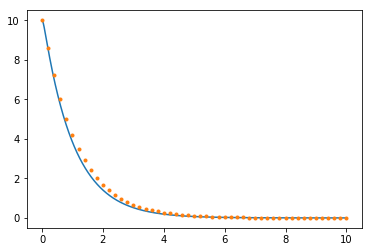

In [5]:
def my_f(t,y):
    A = np.array([[0,1],[-25,-26]])
    return A @ y

def my_jac(t,y):
    A = np.array([[0,1],[-25,-26]])
    return A

def my_exact(t):
    x = (250/24)*np.exp(-t) - (10/24)*np.exp(-25*t)
    xp = (-250/24)*np.exp(-t) + (250/24)*np.exp(-25*t)
    return np.array([x,xp])

h = 0.2
n = 50
y0 = np.array([10,0])
[flag,Y,max_num_steps] = backward_euler_system (
    h,n,0,y0,my_f,my_jac,1e-12,100)
if flag:
    t_approx = np.array(range(0,n+1))*h
    t_exact = np.linspace(0,10,1000)
    y_exact = my_exact(t_exact)
    plt.plot (t_exact,y_exact[0])
    plt.plot (t_approx,Y[0],'.')
    print ("Maximum Number of Steps (Newton\'s Method) = ",
        max_num_steps)
else:
    print ("Backward Euler's Method Failed!")

In [6]:
h1 = 0.005
n1 = 2000
h2 = 0.0025
n2 = 4000
[flag,Y1,max_num_steps] = backward_euler_system (
    h1,n1,0,y0,my_f,my_jac,1e-12,100)
[flag,Y2,max_num_steps] = backward_euler_system (
    h2,n2,0,y0,my_f,my_jac,1e-12,100)
error1 = linalg.norm(Y1[:,n1]-my_exact(10))
error2 = linalg.norm(Y2[:,n2]-my_exact(10))
print (error1/error2)

2.009174558732082


Maximum Number of Steps (Newton's Method) =  1


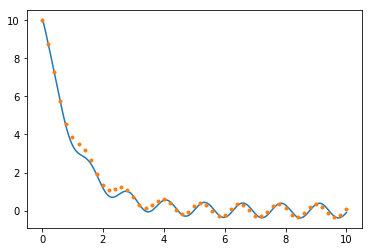

In [7]:
def my_f(t,y):
    A = np.array([[0,1],[-25,-26]])
    b = np.array([0,50*np.cos(5*t)])
    return A @ y + b

def my_jac(t,y):
    A = np.array([[0,1],[-25,-26]])
    return A

def my_exact(t):
    x = (1075/104)*np.exp(-t) - (35/104)*np.exp(-25*t) + (5/13)*np.sin(5*t)
    xp = (-1075/104)*np.exp(-t) + 25*(35/104)*np.exp(-25*t) + (25/13)*np.cos(5*t)
    return np.array([x,xp])

h = 0.2
n = 50
y0 = np.array([10,0])
[flag,Y,max_num_steps] = backward_euler_system (
    h,n,0,y0,my_f,my_jac,1e-12,100)
if flag:
    t_approx = np.array(range(0,n+1))*h
    t_exact = np.linspace(0,10,1000)
    y_exact = my_exact(t_exact)
    plt.plot (t_exact,y_exact[0])
    plt.plot (t_approx,Y[0],'.')
    print ("Maximum Number of Steps (Newton\'s Method) = ",
        max_num_steps)
else:
    print ("Backward Euler's Method Failed!")

In [8]:
h1 = 0.005
n1 = 2000
h2 = 0.0025
n2 = 4000
[flag,Y1,max_num_steps] = backward_euler_system (
    h1,n1,0,y0,my_f,my_jac,1e-12,100)
[flag,Y2,max_num_steps] = backward_euler_system (
    h2,n2,0,y0,my_f,my_jac,1e-12,100)
error1 = linalg.norm(Y1[:,n1]-my_exact(10))
error2 = linalg.norm(Y2[:,n2]-my_exact(10))
print (error1/error2)

1.995218803285222


Maximum Number of Steps (Newton's Method) =  3


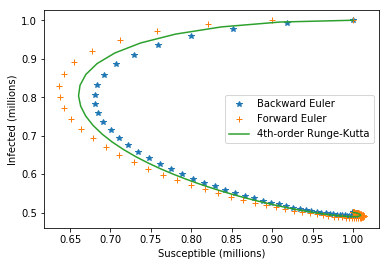

In [9]:
def my_f(t,y):
    S = y[0]
    I = y[1]
    return np.array([-S*I+(2-S-I), S*I-I])

def my_jac(t,y):
    S = y[0]
    I = y[1]
    return np.array([[-I-1, -S-1],[I,S-1]])

h = 0.1
n = 100
y0 = np.array([1,1])
[flag,Y,max_num_steps] = backward_euler_system (
    h,n,0,y0,my_f,my_jac,1e-12,100)
plt.plot (Y[0],Y[1],'*')
Y1 = forward_euler_system (h,n,0,y0,my_f)
Y2 = runge_kutta_system (h,n,0,y0,my_f)
plt.plot (Y1[0],Y1[1],'+')
plt.plot (Y2[0],Y2[1])
plt.legend (['Backward Euler','Forward Euler', 
             '4th-order Runge-Kutta'])
plt.xlabel ('Susceptible (millions)')
plt.ylabel ('Infected (millions)')
print ("Maximum Number of Steps (Newton\'s Method) = ",
       max_num_steps)

In [10]:
h0 = 0.0025
n0 = 4000
Y0 = runge_kutta_system(h0,n0,0,y0,my_f)
h1 = 0.005
n1 = 2000
h2 = 0.0025
n2 = 4000
[flag,Y1,max_num_steps] = backward_euler_system (
    h1,n1,0,y0,my_f,my_jac,1e-12,100)
[flag,Y2,max_num_steps] = backward_euler_system (
    h2,n2,0,y0,my_f,my_jac,1e-12,100)
error1 = linalg.norm(Y1[:,n1]-Y0[:,n0])
error2 = linalg.norm(Y2[:,n2]-Y0[:,n0])
print (error1/error2)

2.008439264926757


In [ ]:
#my code starts here

In [18]:
def implicit_trap_system (h,n,t0,y0,f,jac,eps,max_steps):
    tk = t0
    I = np.identity(len(y0))
    max_num_steps = 0
    
    def i_trap (x):
        return (x - Y[:,k] - (h/2)*(f(tk,Y[:,k]) + f(tk+h,x)))
        
    def trap_jac (x):
        return I - (h/2)*jac(tk+h,x)
        
    Y = np.zeros([len(y0),n+1])
    Y[:,0] = y0
    I = np.identity(len(y0))
    for k in range(0,n):
        [flag,x,num_steps] = newtonsMethod (
            i_trap,trap_jac,Y[:,k],eps,max_steps)
        if num_steps > max_num_steps:
            max_num_steps = num_steps
        if flag:
            Y[:,k+1] = x
        else:
            return [False,Y,max_num_steps]
        tk += h
    return [True,Y,max_num_steps]

Maximum Number of Steps (Newton's Method) =  1


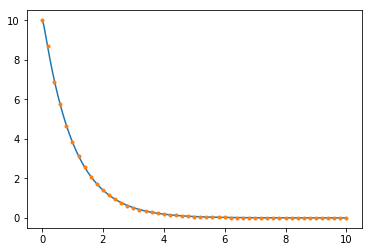

In [19]:
def my_f(t,y):
    A = np.array([[0,1],[-25,-26]])
    return A @ y

def my_jac(t,y):
    A = np.array([[0,1],[-25,-26]])
    return A

def my_exact(t):
    x = (250/24)*np.exp(-t) - (10/24)*np.exp(-25*t)
    xp = (-250/24)*np.exp(-t) + (250/24)*np.exp(-25*t)
    return np.array([x,xp])

h = 0.2
n = 50
y0 = np.array([10,0])
[flag,Y,max_num_steps] = implicit_trap_system (
    h,n,0,y0,my_f,my_jac,1e-12,100)
if flag:
    t_approx = np.array(range(0,n+1))*h
    t_exact = np.linspace(0,10,1000)
    y_exact = my_exact(t_exact)
    plt.plot (t_exact,y_exact[0])
    plt.plot (t_approx,Y[0],'.')
    print ("Maximum Number of Steps (Newton\'s Method) = ",
        max_num_steps)
else:
    print ("Implicit Trap Method Failed!")

In [20]:
h1 = 0.005
n1 = 2000
h2 = 0.0025
n2 = 4000
[flag,Y1,max_num_steps] = implicit_trap_system (
    h1,n1,0,y0,my_f,my_jac,1e-12,100)
[flag,Y2,max_num_steps] = implicit_trap_system (
    h2,n2,0,y0,my_f,my_jac,1e-12,100)
error1 = linalg.norm(Y1[:,n1]-my_exact(10))
error2 = linalg.norm(Y2[:,n2]-my_exact(10))
print (error1/error2)

3.999979997631948


Maximum Number of Steps (Newton's Method) =  1


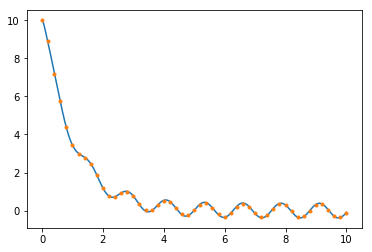

In [21]:
def my_f(t,y):
    A = np.array([[0,1],[-25,-26]])
    b = np.array([0,50*np.cos(5*t)])
    return A @ y + b

def my_jac(t,y):
    A = np.array([[0,1],[-25,-26]])
    return A

def my_exact(t):
    x = (1075/104)*np.exp(-t) - (35/104)*np.exp(-25*t) + (5/13)*np.sin(5*t)
    xp = (-1075/104)*np.exp(-t) + 25*(35/104)*np.exp(-25*t) + (25/13)*np.cos(5*t)
    return np.array([x,xp])

h = 0.2
n = 50
y0 = np.array([10,0])
[flag,Y,max_num_steps] = implicit_trap_system (
    h,n,0,y0,my_f,my_jac,1e-12,100)
if flag:
    t_approx = np.array(range(0,n+1))*h
    t_exact = np.linspace(0,10,1000)
    y_exact = my_exact(t_exact)
    plt.plot (t_exact,y_exact[0])
    plt.plot (t_approx,Y[0],'.')
    print ("Maximum Number of Steps (Newton\'s Method) = ",
        max_num_steps)
else:
    print ("Implicit Trap Method Failed!")

In [22]:
h1 = 0.005
n1 = 2000
h2 = 0.0025
n2 = 4000
[flag,Y1,max_num_steps] = implicit_trap_system (
    h1,n1,0,y0,my_f,my_jac,1e-12,100)
[flag,Y2,max_num_steps] = implicit_trap_system (
    h2,n2,0,y0,my_f,my_jac,1e-12,100)
error1 = linalg.norm(Y1[:,n1]-my_exact(10))
error2 = linalg.norm(Y2[:,n2]-my_exact(10))
print (error1/error2)

4.00030348466721


Maximum Number of Steps (Newton's Method) =  3


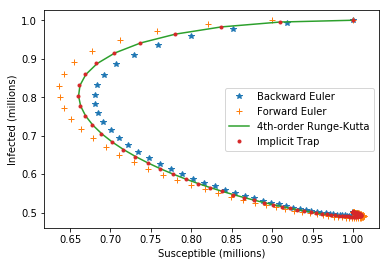

In [25]:
def my_f(t,y):
    S = y[0]
    I = y[1]
    return np.array([-S*I+(2-S-I), S*I-I])

def my_jac(t,y):
    S = y[0]
    I = y[1]
    return np.array([[-I-1, -S-1],[I,S-1]])

h = 0.1
n = 100
y0 = np.array([1,1])
[flag,Y,max_num_steps] = backward_euler_system (
    h,n,0,y0,my_f,my_jac,1e-12,100)
plt.plot (Y[0],Y[1],'*')
Y1 = forward_euler_system (h,n,0,y0,my_f)
Y2 = runge_kutta_system (h,n,0,y0,my_f)
plt.plot (Y1[0],Y1[1],'+')
plt.plot (Y2[0],Y2[1])

[flag,Y,max_num_steps] = implicit_trap_system (
    h,n,0,y0,my_f,my_jac,1e-12,100)
plt.plot (Y[0],Y[1],'.')

plt.legend (['Backward Euler','Forward Euler', 
             '4th-order Runge-Kutta', 'Implicit Trap'])
plt.xlabel ('Susceptible (millions)')
plt.ylabel ('Infected (millions)')
print ("Maximum Number of Steps (Newton\'s Method) = ",
       max_num_steps)

In [26]:
h0 = 0.0025
n0 = 4000
Y0 = runge_kutta_system(h0,n0,0,y0,my_f)
h1 = 0.005
n1 = 2000
h2 = 0.0025
n2 = 4000
[flag,Y1,max_num_steps] = implicit_trap_system (
    h1,n1,0,y0,my_f,my_jac,1e-12,100)
[flag,Y2,max_num_steps] = implicit_trap_system (
    h2,n2,0,y0,my_f,my_jac,1e-12,100)
error1 = linalg.norm(Y1[:,n1]-Y0[:,n0])
error2 = linalg.norm(Y2[:,n2]-Y0[:,n0])
print (error1/error2)

3.997352743548126
